Derivadas parciales:
∂g/∂x = 2*x - 4
∂g/∂y = 6*y + 2

Punto crítico encontrado: [{x: 2, y: -1/3}]

Matriz Hessiana evaluada en el punto crítico:
⎡2  0⎤
⎢    ⎥
⎣0  6⎦

Valores propios de la Hessiana:
{2: 1, 6: 1}

Clasificación del punto crítico: mínimo local


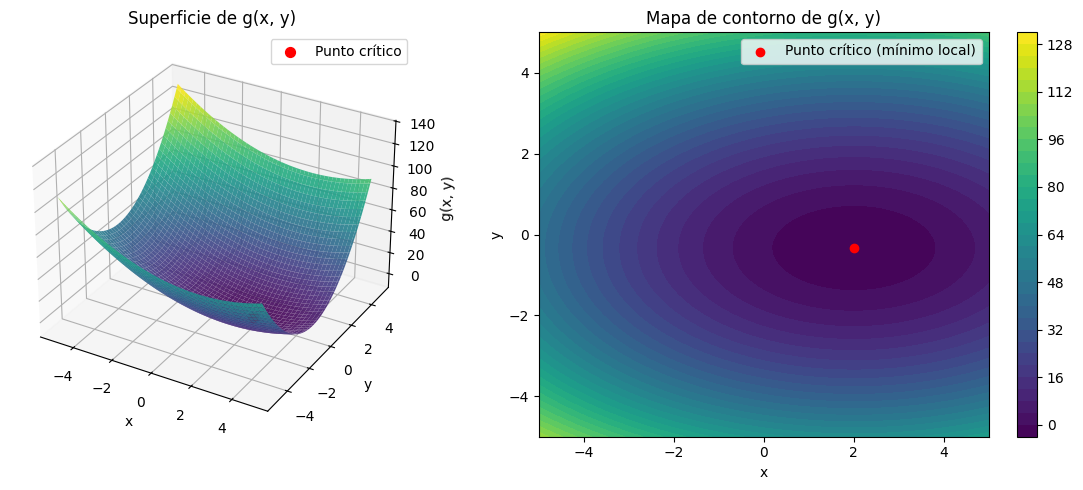

In [1]:
# importación del linbrerias necesarias:

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1.- Definición simbólica de la función

x, y = sp.symbols('x y')
g = x**2 + 3*y**2 - 4*x + 2*y + 1

# 2.- Derivadas parciales, gradiente y matriz Hessiana

# Derivadas parciales
dg_dx = sp.diff(g, x)
dg_dy = sp.diff(g, y)

# Gradiente (vector con las dos parciales)
gradiente = sp.Matrix([dg_dx, dg_dy])

# Matriz Hessiana (segunda derivada parcial respecto a x e y)
hessiana = sp.hessian(g, (x, y))

# Resolvemos gradiente = 0 para encontrar puntos críticos
puntos_criticos = sp.solve([dg_dx, dg_dy], (x, y), dict=True)

print("Derivadas parciales:")
print("∂g/∂x =", dg_dx)
print("∂g/∂y =", dg_dy)
print("\nPunto crítico encontrado:", puntos_criticos)

# 3.- Clasificación del punto crítico

# Evaluamos la Hessiana en el punto crítico
p_crit = puntos_criticos[0]
H_evaluada = hessiana.subs(p_crit)

# Calculamos valores propios
valores_propios = H_evaluada.eigenvals()

print("\nMatriz Hessiana evaluada en el punto crítico:")
sp.pprint(H_evaluada)

print("\nValores propios de la Hessiana:")
sp.pprint(valores_propios)

# Clasificación del punto crítico
vp = list(valores_propios.keys())
if all([v > 0 for v in vp]):
    clasificacion = "mínimo local"
elif all([v < 0 for v in vp]):
    clasificacion = "máximo local"
else:
    clasificacion = "punto de silla"

print(f"\nClasificación del punto crítico: {clasificacion}")

# 4.- Visualización

# Convertimos g(x, y) a función numérica
g_np = sp.lambdify((x, y), g, modules='numpy')

# Rango de visualización
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = g_np(X, Y)

# Coordenadas del punto crítico
x_critico = float(p_crit[x])
y_critico = float(p_crit[y])
z_critico = g_np(x_critico, y_critico)

# Gráfico 3D de la superficie
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.9)
ax.scatter(x_critico, y_critico, z_critico, color='red', s=50, label='Punto crítico')
ax.set_title('Superficie de g(x, y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('g(x, y)')
ax.legend()

# Gráfico de contorno
ax2 = fig.add_subplot(1, 2, 2)
cont = ax2.contourf(X, Y, Z, levels=40, cmap='viridis')
ax2.scatter(x_critico, y_critico, color='red', label=f'Punto crítico ({clasificacion})')
ax2.set_title('Mapa de contorno de g(x, y)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend()
plt.colorbar(cont, ax=ax2)

plt.tight_layout()
plt.show()

# 5. Comentario final:


# En el entrenamiento de modelos de machine learning, los parámetros del modelo se ajustan minimizando
# una función de pérdida. Este proceso se basa en calcular el gradiente de dicha función y moverse en dirección
# opuesta al gradiente (descenso). La matriz Hessiana también es útil para analizar la curvatura local
# de la función objetivo, permitiendo detectar la naturaleza de los puntos críticos.

# Optimización y Análisis Geométrico de Funciones en Dos Variables

Esta actividad tuvo por objetivo aplicar técnicas de cálculo diferencial multivariable para analizar una función de dos variables reales. Se abordaron conceptos como derivadas parciales, gradiente, matriz Hessiana, puntos críticos y su clasificación, complementando el análisis con representaciones gráficas.

## Definición y derivación simbólica

Se trabajó con la función \( g(x, y) = x^2 + 3y^2 - 4x + 2y + 1 \), definida simbólicamente con la librería `SymPy`. A partir de esta, se calcularon las derivadas parciales con respecto a \( x \) y \( y \), y se construyó el vector gradiente \( \nabla g(x, y) \) y la matriz Hessiana correspondiente.

## Identificación y clasificación de puntos críticos

El sistema \( \nabla g(x, y) = (0, 0) \) fue resuelto simbólicamente, identificando un único punto crítico. Posteriormente, se evaluó la matriz Hessiana en dicho punto y se calcularon sus valores propios. La naturaleza del punto crítico fue determinada a partir del signo de dichos valores propios, clasificándose como un mínimo local, máximo local o punto de silla.

## Visualización

Para complementar el análisis simbólico, se transformó la función \( g(x, y) \) en una función numérica utilizando `lambdify`. Se generaron valores de \( x \) e \( y \) sobre un dominio rectangular centrado en el origen, y se construyó un gráfico de superficie 3D y un mapa de contorno. En ambos gráficos se marcó claramente la ubicación del punto crítico y su clasificación, permitiendo una interpretación geométrica de los resultados obtenidos.

## Relevancia en Machine Learning

El cálculo del gradiente y la evaluación de la matriz Hessiana son herramientas fundamentales en el entrenamiento de modelos de aprendizaje automático. La optimización de funciones de pérdida mediante métodos de descenso de gradiente se basa directamente en la información proporcionada por el gradiente. Adicionalmente, el análisis de la curvatura local mediante la Hessiana permite mejorar la eficiencia de los algoritmos de optimización, especialmente en métodos de segundo orden.

## Conclusión

Esta actividad permitió aplicar conceptos clave del cálculo multivariable utilizando herramientas simbólicas y numéricas. La combinación de análisis algebraico y visual refuerza la comprensión de las técnicas empleadas en el entrenamiento de modelos de machine learning y en la optimización matemática en general.